In [79]:
print("Hello world")

Hello world


In [80]:
words=open("names.txt","r").read().splitlines()

In [81]:
min(len(name) for name in words)

2

In [82]:
max(len(name) for name in words)

15

We are gonna start with a bigram here!

In [83]:
b={}

for w in words:
    # Add special start/end characters (Karpathy uses '.' to keep it simple)
    chs = ['<S>'] + list(w) + ['<E>']
    
    # The 'zip' magic to create pairs
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

    

In [84]:
b

# sort b

sorted(b.items(),key=lambda kv: -kv[1])


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [85]:
import torch 

a=torch.zeros((3,5),dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [86]:
a[1,3]=1 # row,column
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [87]:
N=torch.zeros((27,27),dtype=torch.int32)

In [88]:
char=sorted(list(set(''.join(words))))

In [89]:
stoi={s:i+1 for i,s in enumerate(char)}
stoi['.'] = 0
# print('-'*40)
itos={i:s for s,i in stoi.items()}
# itos
stoi
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [90]:

for w in words:
    # Add special start/end characters (Karpathy uses '.' to keep it simple)
    chs = ['.'] + list(w)+ ['.']
    
    # The 'zip' magic to create pairs
    
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2] += 1 # the reason why we do +1 is because it doesnt count the instance in hand and we need a counter in order to count it properly

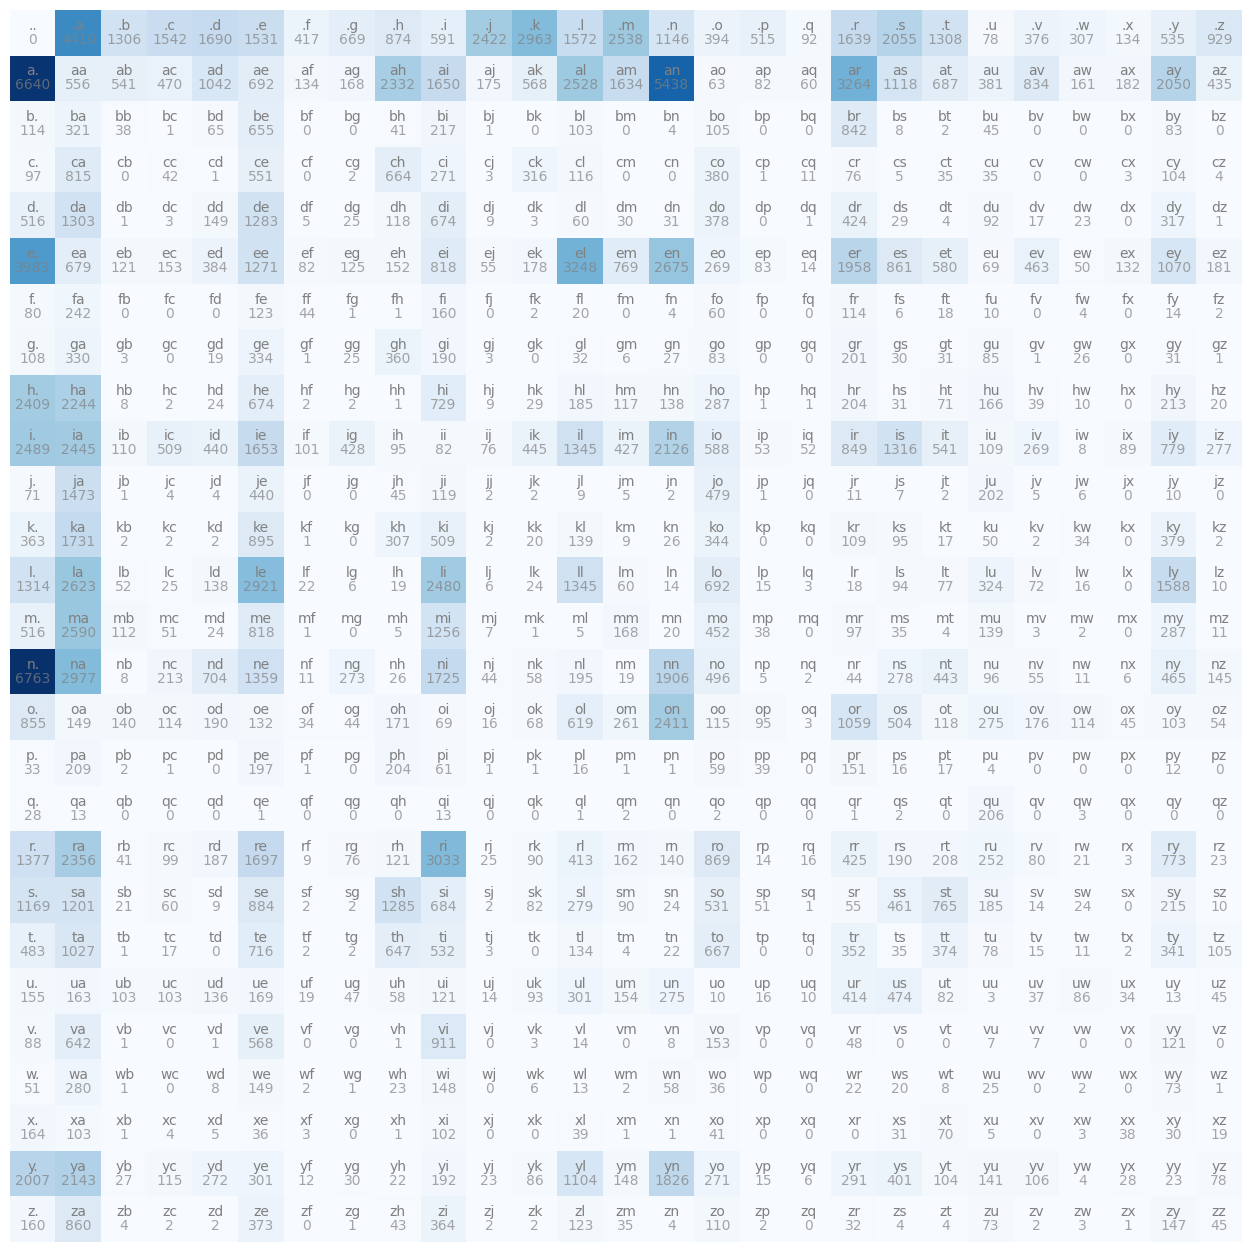

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray',alpha=0.7)
        plt.axis('off')

In [92]:
N[0:]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [93]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [94]:
p=N[0].float()

p=p/p.sum()

p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [95]:

g=torch.Generator().manual_seed(2147483647)
index=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
index

3

In [96]:
g=torch.Generator().manual_seed(2147483647)
p=torch.rand(3,generator=g)
p=p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [97]:
torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [98]:
P=(N+1).float()
P=P/P.sum(1,keepdim=True)
P.shape

torch.Size([27, 27])

In [99]:
g=torch.Generator().manual_seed(2147483647)
for i in range(5):
    out=[]

    ix=0
    while True:
        p=P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [100]:
log_likelihood=0.0
n=0
for w in 'neha':
    
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        probability=P[ix1,ix2]
        log_probability=torch.log(probability)
        log_likelihood+=log_probability
        n+=1
        # print(f'{ch1}{ch2}: {probability:.4f}, Log probability: {log_probability:.4f}')

print(f'{log_likelihood=}')
nll=-log_likelihood
print(f'{nll:.4f}')
print(f'average NLL: {nll/n:.4f}')

log_likelihood=tensor(-17.3747)
17.3747
average NLL: 2.1718


We are Gonna make this via Neural Network 

In [101]:
# gotta make the training set of the bigrams
xs,ys=[],[] # xs is the input and ys are the labels for it 
for w in words:
    
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2) 

xs=torch.tensor(xs)
ys=torch.tensor(ys)
num=xs.nelement()

In [102]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [103]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [104]:
# now we are gonna do onehot-encoding for these tensors for NN

import torch.nn.functional as F

x_encoded=F.one_hot(xs[:5],num_classes=27).float()
x_encoded.shape

x_encoded.dtype


torch.float32

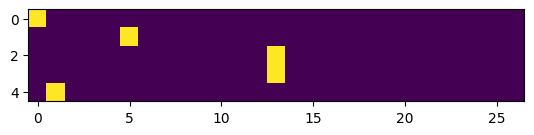

In [105]:
plt.imshow(x_encoded)

In [106]:
g=torch.Generator().manual_seed(2147483647)
w=torch.randn((27,27),generator=g,requires_grad=True)
(x_encoded@w).shape

torch.Size([5, 27])

In [107]:
# we exponentiated them in-order to get +ve probability based num

logits=(x_encoded@w)
counts=logits.exp()

prob=counts/counts.sum(1,keepdim=True)

prob[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)

Loss and backpropogation 

In [108]:
prob[0,5] , prob[1,13] , prob [2,13] , prob[3,1],prob[4,0] # checking random values 


(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [109]:
loss=-prob[torch.arange(5),ys[:5]].log().mean() # this is the loss that we found --> very high
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [110]:
# backward pass 

w.grad=None # set gradient to 0
loss.backward(retain_graph=True)
print(loss)

tensor(3.7693, grad_fn=<NegBackward0>)


In [111]:
w.grad.shape

torch.Size([27, 27])

In [112]:
w.data+= -0.1*w.grad

In [113]:
print(loss.item())

3.7693049907684326


In [114]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
    
for k in range(100):
    # Forward Pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    
    print(loss.item())
    
    # Backward Pass
    W.grad = None
    loss.backward()
    
    # Update (Try -10 instead of -100)
    W.data += -10 * W.grad

3.7686190605163574
3.6794421672821045
3.5999374389648438
3.528468370437622
3.463968515396118
3.4056591987609863
3.352914571762085
3.305180788040161
3.261941909790039
3.222700595855713
3.186985969543457
3.1543641090393066
3.124450206756592
3.0969085693359375
3.0714569091796875
3.047856569290161
3.025909900665283
3.005449056625366
2.9863314628601074
2.968435287475586
2.951653242111206
2.935891628265381
2.92106556892395
2.907099962234497
2.8939261436462402
2.881481885910034
2.869711399078369
2.858562707901001
2.8479881286621094
2.8379459381103516
2.8283965587615967
2.819303512573242
2.8106343746185303
2.8023593425750732
2.7944512367248535
2.7868854999542236
2.7796385288238525
2.7726893424987793
2.766019344329834
2.7596113681793213
2.753448247909546
2.747516393661499
2.7418017387390137
2.7362918853759766
2.730975389480591
2.7258412837982178
2.7208809852600098
2.7160844802856445
2.711444854736328
2.7069520950317383
2.7026009559631348
2.6983847618103027
2.6942965984344482
2.690331220626831
2

In [115]:
# time to sample for this 'neural network'
g = torch.Generator().manual_seed(2147483647)
for _ in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        count=logits.exp()
        probs=count/count.sum(1,keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


cexza.
mogllurailezityha.
konimittain.
llayn.
ka.


Makemore part 2 starts from here ! 

In [116]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# read all the words 

words=open("names.txt","r").read().splitlines()
len(words)
words[:5]



['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [118]:
chars=sorted((list(set(''.join(words)))))

stoi={j:i+1 for i,j in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}



In [119]:
block_size=3
X,Y=[],[]


for w in words:
    context=[0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+[ix]

X=torch.tensor(X)
Y=torch.tensor(Y)


In [120]:
X.shape,Y.shape,X.dtype,Y.dtype

(torch.Size([228146, 3]), torch.Size([228146]), torch.int64, torch.int64)

In [121]:
C=torch.randn((27,2))
C

tensor([[ 1.2410,  1.5341],
        [ 0.7138,  0.4507],
        [ 1.5089, -0.9269],
        [-1.1726,  2.4502],
        [-0.1019,  0.7390],
        [-1.3428,  0.2011],
        [ 1.5156, -1.2494],
        [ 0.6494, -0.5547],
        [ 0.1601,  2.1947],
        [ 1.2276, -0.8123],
        [-1.2234,  0.5074],
        [-0.5907, -1.3442],
        [ 0.5458,  1.5606],
        [-1.0752,  0.2879],
        [ 1.8557, -0.9576],
        [ 1.7975, -0.7403],
        [ 0.0092,  0.0371],
        [ 1.3323,  0.3335],
        [-1.5300, -1.2560],
        [-0.3690, -0.3141],
        [ 0.5279,  0.2753],
        [-0.6437, -1.4761],
        [ 0.6900,  0.2373],
        [-0.2690, -0.4018],
        [-0.7411,  0.5746],
        [ 1.1672,  0.3450],
        [ 0.5198,  1.0739]])

In [122]:
C[5]

tensor([-1.3428,  0.2011])

In [123]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C # this is the same output because we got the same vector via matrix multiplication and this is done via masking all the other columns other than the 5th one due to one-hot encoding 

tensor([-1.3428,  0.2011])

In [124]:
embedding=C[X]
embedding.shape

torch.Size([228146, 3, 2])

In [125]:
X[13,2]

tensor(1)

In [126]:
w1=torch.randn((6,100))
b1=torch.randn(100)


In [127]:
h=torch.tanh(embedding.view(-1,6) @ w1+b1)
h

tensor([[ 0.9998, -0.9970, -0.9458,  ...,  0.9996, -1.0000, -0.1889],
        [ 0.9989, -0.9999, -0.6491,  ...,  1.0000, -0.9999, -0.6899],
        [ 0.5782, -0.9996, -0.3590,  ...,  0.8239,  0.9748, -1.0000],
        ...,
        [ 0.9977, -0.8947, -0.9888,  ...,  0.9838, -1.0000, -0.0962],
        [ 0.9947, -0.9867, -0.9397,  ...,  0.9823, -0.9999, -0.0138],
        [ 0.9957, -0.9995,  0.3653,  ...,  0.9730, -0.8954, -0.9797]])

In [128]:
h.shape

torch.Size([228146, 100])

In [129]:
w2=torch.randn((100,27))
b2=torch.randn(27)

logits=h@w2+b2

prob=logits.exp()
counts=logits/logits.sum(1,keepdim=True)

prob.shape


torch.Size([228146, 27])

In [130]:
loss = -prob[torch.arange(228146) , Y].log().mean()
loss

tensor(-1.0878)

Write it in a more respectable manner

In [131]:
g=torch.Generator().manual_seed(2147483647)
C=torch.randn((27,2),generator=g)
w1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
w2=torch.randn((100,27),generator=g)
b2=torch.randn((27),generator=g)
parameters=[C,w1,b1,w2,b2]
sum(p.nelement() for p in parameters)

3481

In [132]:
emb=C[X]
h=torch.tanh(emb.view(-1,6)@w1+b1)
logits=h@w2+b2
# counts=logits.exp()
# prob=counts/counts.sum(1,keepdim=True)
# loss=-prob[torch.arange(32),Y].log().mean()
loss

tensor(-1.0878)

In [133]:
F.cross_entropy(logits,Y)

tensor(19.5052)

In [134]:
for p in parameters:
    p.requires_grad=True

In [135]:
# we create a list of learning rate to determine the right one

lre=torch.linspace(-3,0,1000)
lrs=10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [136]:
lres=[]
losses=[]
for i in range(1000):
    # mini batch construct
    ix = torch.randint(0, X.shape[0], (32,))


    emb=C[X[ix]]
    h=torch.tanh(emb.view(-1,6)@w1+b1)
    logits=h@w2+b2
    loss=F.cross_entropy(logits,Y[ix])
    for p in parameters:
        p.grad=None
    loss.backward()

    lr=lrs[i]
    for p in parameters:
        p.data+= -lr*p.grad # therefore 0.01 was the perfect one ! so we will use 0.1 itself 
# track states
    lres.append(lr)
    losses.append(loss.item())

In [137]:
losses

[21.18981170654297,
 20.3428955078125,
 15.800409317016602,
 18.721477508544922,
 17.425127029418945,
 18.861534118652344,
 21.928842544555664,
 17.311738967895508,
 16.69969367980957,
 16.613962173461914,
 16.62160873413086,
 18.151517868041992,
 17.638429641723633,
 14.211708068847656,
 19.009944915771484,
 16.945880889892578,
 18.07855796813965,
 19.69645881652832,
 20.195955276489258,
 18.09093475341797,
 18.917570114135742,
 16.997129440307617,
 17.6685848236084,
 18.047969818115234,
 16.957868576049805,
 22.34384536743164,
 18.26014518737793,
 21.099672317504883,
 16.203359603881836,
 16.613813400268555,
 20.769258499145508,
 19.089914321899414,
 18.848257064819336,
 18.000417709350586,
 22.193880081176758,
 15.114148139953613,
 18.517353057861328,
 17.606327056884766,
 16.770700454711914,
 19.14200210571289,
 17.352161407470703,
 18.17938804626465,
 20.298561096191406,
 20.445913314819336,
 18.8917236328125,
 16.834245681762695,
 17.68474006652832,
 19.304367065429688,
 19.17900

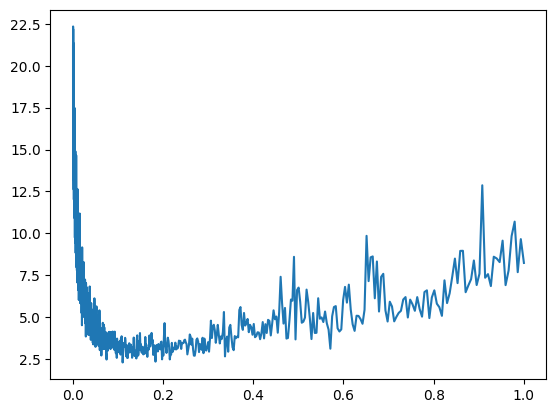

In [138]:
plt.plot(lres,losses)

In [139]:
# build the dataset
def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:
    
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      # print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])        # 80% for Training
Xdev, Ydev = build_dataset(words[n1:n2])    # 10% for Validation (Dev)
Xte, Yte = build_dataset(words[n2:])        # 10% for Testing

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])
torch.Size([22866, 3]) torch.Size([22866])


In [140]:
# --- 1. Hyperparameters ---
n_embd = 10 
n_hidden = 200 
block_size = 3 
batch_size = 32
max_steps = 200000

# --- 2. Initialization ---
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, n_embd), generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.01
b1 = torch.randn(n_hidden, generator=g) * 0.01
W2 = torch.randn((n_hidden, 27), generator=g) * 0.01 # we set this to low to get estimated loss weight
b2 = torch.randn(27, generator=g) * 0 # we make the bias to zero 

# Correction: Standard Init (if you found the Kaiming init line too complex, he often just uses standard randn)
# But to get 2.17 strictly, he carefully initializes. 
# For simplicity, let's stick to the standard readable init + scaling:
parameters = [C, W1, b1, W2, b2]
print(f"Total parameters: {sum(p.nelement() for p in parameters)}")

for p in parameters:
  p.requires_grad = True

# --- 3. The Training Loop ---
lossi = []

for i in range(max_steps):
  
  # a) Minibatch Construction
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  
  # b) Forward Pass
  emb = C[Xb] 
  embcat = emb.view(emb.shape[0], -1) 
  hpre = embcat @ W1 + b1 
  h = torch.tanh(hpre) 
  logits = h @ W2 + b2 
  loss = F.cross_entropy(logits, Yb) 

  # c) Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # d) Update (Learning Rate Decay!)
  lr = 0.1 if i < 100000 else 0.01 
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  if i % 10000 == 0:
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  break

# testing 
with torch.no_grad(): 
  emb = C[Xdev]
  h = torch.tanh(emb.view(-1, n_embd * block_size) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ydev)
  print(f"Validation Loss: {loss.item():.4f}")

Total parameters: 11897
      0/ 200000: 3.2972
Validation Loss: 3.2906


MakeMore part 3

In [141]:
h

tensor([[-0.0999,  0.0183, -0.0011,  ...,  0.0031,  0.0539,  0.0740],
        [-0.0214, -0.0479, -0.0624,  ...,  0.0098, -0.0095,  0.0035],
        [-0.1455,  0.0331, -0.1063,  ...,  0.0577,  0.0315,  0.0165],
        ...,
        [ 0.0371, -0.0618, -0.0388,  ...,  0.0067, -0.0496, -0.0345],
        [-0.0891, -0.0347, -0.0231,  ...,  0.0627, -0.0922, -0.0585],
        [ 0.0234, -0.0655, -0.0699,  ...,  0.0861, -0.0936, -0.1419]])

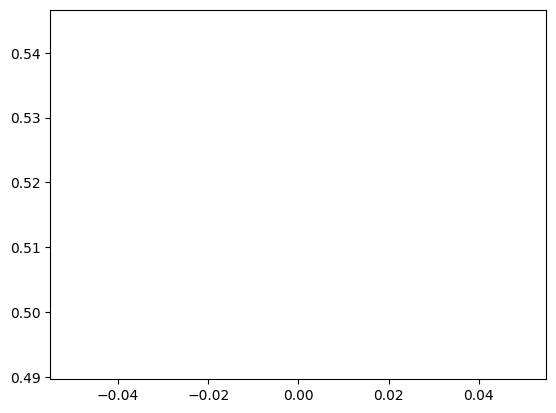

In [142]:
plt.plot(lossi)

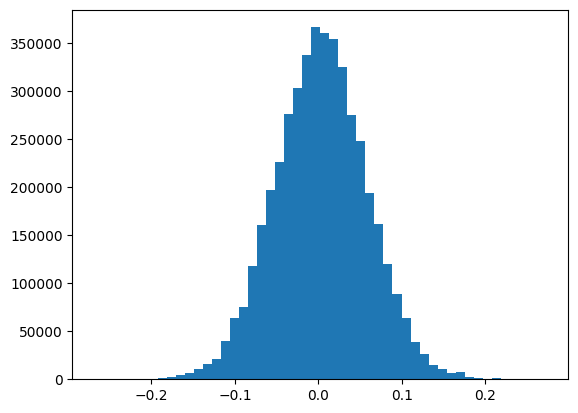

In [143]:
plt.hist(h.view(-1).tolist(),50);

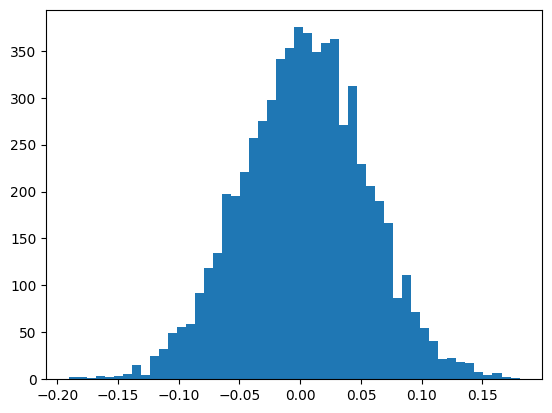

In [144]:
plt.hist(hpre.view(-1).tolist(),50);

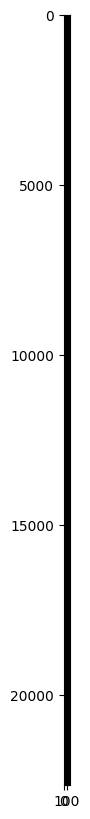

In [145]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs()>0.99,cmap='gray',interpolation='nearest')

Weight initialisation

tensor(0.0084) tensor(0.9947)
tensor(0.0088) tensor(0.3139)


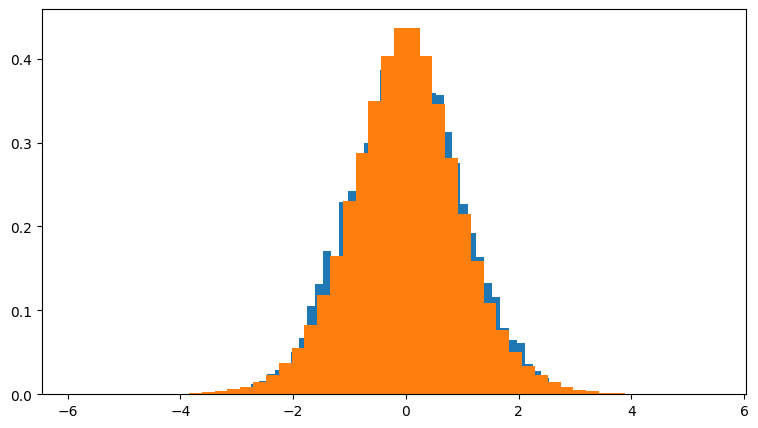

In [146]:
x=torch.randn(1000,10)
w=torch.randn(10,200) /10**0.5 # fan-in is the 10 number that we can see in the size of w.
y=x@w
print(x.mean(),x.std())
print(w.mean(),w.std())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(),50,density=True);
plt.hist(y.view(-1).tolist(),50,density=True);

In [147]:
(torch.randn(1000)).std()

tensor(1.0343)

Batch Normalisation --> makemore part 3

In [148]:
hpre.shape

torch.Size([32, 200])

In [149]:
hpre.mean(0,keepdim=True).shape
hpre.std(0,keepdim=True).shape


torch.Size([1, 200])

In [150]:
# --- 1. Hyperparameters ---
n_embd = 10 
n_hidden = 200 
block_size = 3 
batch_size = 32
max_steps = 200000

# --- 2. Initialization ---
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, n_embd), generator=g)
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * 0.01
b1 = torch.randn(n_hidden, generator=g) * 0.01
W2 = torch.randn((n_hidden, 27), generator=g) * 0.01 # we set this to low to get estimated loss weight or we could do (5/3) /fan-in**0.5
b2 = torch.randn(27, generator=g) * 0 # we make the bias to zero 

bngain=torch.ones((1,n_hidden))
bnbias=torch.zeros((1,n_hidden))
bnmean_running=torch.zeros((1,n_hidden))
bnstd_running=torch.ones((1,n_hidden))

parameters = [C, W1, b1, W2, b2,bngain,bnbias]
print(f"Total parameters: {sum(p.nelement() for p in parameters)}")

Total parameters: 12297


In [151]:
parameters = [C, W1, W2, b2, bngain, bnbias]
for p in parameters:
  p.requires_grad = True

# --- 3. The Training Loop ---
lossi = []

for i in range(max_steps):
  
  # a) Minibatch Construction
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y
  
  # b) Forward Pass
  emb = C[Xb] 
  embcat = emb.view(emb.shape[0], -1) 
  
  # FIX 1: Remove 'b1'. It is mathematically useless because Batch Norm 
  # subtracts the mean anyway. 'bnbias' is the new bias.
  hpre = embcat @ W1 
  
  bnmeani = hpre.mean(0, keepdim=True)
  bnstdi  = hpre.std(0,  keepdim=True)
  
  # The Normalization Step
  hpreact = bngain * (hpre - bnmeani) / bnstdi + bnbias

  # Update Running Stats (Long-term memory)
  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running  = 0.999 * bnstd_running  + 0.001 * bnstdi
    
  # FIX 2 (CRITICAL): Pass 'hpreact' (the normalized one) into tanh.
  # Your original code passed 'hpre' (the raw one), which ignored 
  # all the batch norm work you just did!
  h = torch.tanh(hpreact) 
  
  logits = h @ W2 + b2 
  loss = F.cross_entropy(logits, Yb) 

  # c) Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # d) Update
  lr = 0.1 if i < 100000 else 0.01 
  for p in parameters:
    p.data += -lr * p.grad

  # Track stats
  if i % 10000 == 0:
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  break # just to do it for 1st iteration we use the break keyword 
  

      0/ 200000: 3.3147


In [152]:
# calibrate the batch norm at the end of training
with torch.no_grad():
  # 1. Pass the entire training set through the first layers
  emb = C[Xtr]
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 # + b1 is ignored if using BN

  # 2. Measure the mean/std over the ENTIRE training set
  bnmean = hpreact.mean(0, keepdim=True)
  bnstd = hpreact.std(0, keepdim=True)

Pytorch Version of the code

In [153]:
class Linear:
    def __init__(self,fan_in,fan_out,bias=True):
        self.weight=torch.randn((fan_in,fan_out),generator=g)/ fan_in**0.5
        self.bias=bias

    def __call__(self, x):
        self.out=x @ self.weight
        if self.bias is not None:
            self.out+=self.bias
        
        return self.out
    
    def parameters(self):
        return [self.weight]+([] if self.bias is None else [self.bias])    

In [154]:
class BatchNorm1d:
    def __init__(self,dim,eps=1e-5,momentum=0.1):
        self.eps=eps
        self.momentum=momentum
        self.training=True
        # parameters (trained with backprop)
        self.gamma=torch.ones(dim)
        self.beta=torch.zeros(dim)
        # buffers (training with a running momentum update)
        self.running_mean=torch.zeros(dim)
        self.running_var=torch.ones(dim)

    def __call__(self, x):
        if self.training:
            xmean=x.mean(0,keepdim=True) # batch mean
            xvar=x.var(0,keepdim=True) # batch variance
        else:
            xmean=self.running_mean
            xvar=self.running_var
        xhat=(x-xmean)/torch.sqrt(xvar+self.eps) # normalise the unit variance
        self.out=self.gamma*xhat+self.beta

        # update the buffers

        if self.training:
            with torch.no_grad():
                self.running_mean=(1-self.momentum)*self.running_mean+self.momentum*xmean
                self.running_var=(1-self.momentum)*self.running_var+self.momentum*xvar
        return self.out

    def parameters(self):
        return [self.gamma,self.beta]
        


In [155]:
class Tanh:
    def __call__(self, x):
        self.out=torch.tanh(x)
        return self.out
    
    def parameters(self):
        return []